In [32]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
plt.style.use('ggplot')

In [34]:
iris = datasets.load_iris()

In [35]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [36]:
iris.data.shape

(150, 4)

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.target.shape

(150,)

In [39]:
np.unique(iris.target)

array([0, 1, 2])

In [40]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

Text(0,0.5,'sepal width (cm)')

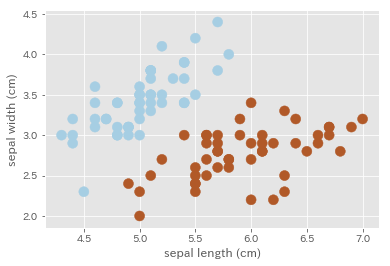

In [41]:
plt.scatter(data[:,0],data[:,1],c=target,
            cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [42]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data,target,test_size=0.1,random_state=42)

In [43]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [44]:
X_test.shape,y_test.shape

((10, 4), (10,))

In [45]:
lr = cv2.ml.LogisticRegression_create()

In [46]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [47]:
lr.setIterations(100)

In [48]:
lr.train(X_train, cv2.ml.ROW_SAMPLE,y_train)

True

In [49]:
lr.get_learnt_thetas()

array([[-0.04109114, -0.01968078, -0.16216497,  0.28704914,  0.11945517]],
      dtype=float32)

In [50]:
ret, y_pred = lr.predict(X_train)

In [51]:
metrics.accuracy_score(y_train,y_pred)

1.0

In [52]:
ret,y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0